## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [12]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


NVIDIA-SMI has failed because you are not:
	a) running as an administrator or
	b) there is not at least one TCC device in the system



In [13]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [14]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
"""
Your code here
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(-1,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( Data ) # Data 為原始資料
MinMaxScaler().fit_transform(df)
ValueError: Found array with dim 4. MinMaxScaler expected <= 2.
"""
from sklearn.preprocessing import MinMaxScaler


def preproc_x(x,flatten=True):
    lambda x:(2*(x-x.min())/((x.max()-x.min())))-1
    if flatten:
        x= x.reshape((len(x),-1)) #是-1则表示可以自动推测出最後一項
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1]==1:
        y=keras.utils.to_categorical(y, num_classes)
    return y

    

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128,64,32,16,16,16]):
    input_layer= keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x= keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x= keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)

    out=keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [24]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [25]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0817 11:37:01.107132 12144 deprecation_wrapper.py:119] From C:\Users\b99401105\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 11:37:01.126118 12144 deprecation_wrapper.py:119] From C:\Users\b99401105\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [27]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0817 11:38:01.988032 12144 deprecation.py:323] From C:\Users\b99401105\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 11:38:02.096965 12144 deprecation_wrapper.py:119] From C:\Users\b99401105\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 439us/step - loss: 14.5075 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 19s 382us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 19s 383us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 19s 383us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 19s 383us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 22s 435us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 22s 439us/step - loss: 14.5063 - acc: 0

50000/50000 [==============================] - 22s 449us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 59/100
50000/50000 [==============================] - 25s 496us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 25s 494us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 23s 464us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 19s 381us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 19s 379us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 18s 367us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100

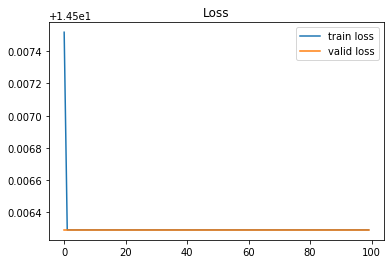

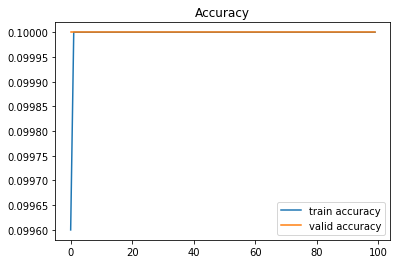

In [28]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()